# **<center>Autism Spectrum Disorder and Various Models</center>**

**<h1><center>Table of Contents</center></h1>**

[1. DATA DICTIONARY](#data-dictionary)

[2. IMPORTING LIBRARIES](#importing-libraries)
    
[3. LOADING DATA](#loading-data)    

[4. EXPLORATORY DATA ANALYSIS](#exploratory-data-analysis)

[5. DATA PREPROCESSING](#data-preprocessing)     

[6. MODEL BUILDING](#model-building) 

[7. CONCLUSION](#conclusion) 

[8. END](#end) 

<a id=data-dictionary></a>
# **DATA DICTIONARY**

Details of variables mapping to the Q-Chat-10 screening methods

Variable in Dataset	Corresponding Q-chat-10-Toddler Features

1.  A1	Does your child look at you when you call his/her name?
2.  A2	How easy is it for you to get eye contact with your child? 
3.  A3	Does your child point to indicate that s/he wants something? (e.g. a toy that is out of reach) 
4.  A4	Does your child point to share interest with you? (e.g. pointing at an interesting sight) 
5.  A5	Does your child pretend? (e.g. care for dolls, talk on a toy phone) 
6.  A6	Does your child follow where you’re looking? 
7.  A7	If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them? (e.g. stroking hair, hugging them)
8.  A8	Would you describe your child’s first words as: 
9.  A9	Does your child use simple gestures? (e.g. wave goodbye) 
10. A10	Does your child stare at nothing with no apparent purpose? 

**Other Features**
1. Age	Number 	Toddlers (months)
2. Score by Q-chat-10 	Number	1-10 (Less than or equal to 3) --> no ASD traits; > 3 ASD traits
3. Sex	Character:	Male or Female 
4. Ethnicity:	String	List of common ethnicities in text format 
5. Born with jaundice:	Boolean  (yes or no)	Whether the case was born with jaundice
6. Family member with ASD history:	Boolean  (yes or no)	Whether any immediate family member has a PDD 
7. Who is completing the test:	String 	Parent, self, caregiver, medical staff, clinician ,etc.
8. Why_are_you_taken_the_screening	String:	Use input textbox 
9. Class variable: 	String 	ASD traits or No ASD traits (automatically assigned by the ASDTests app). (Yes / No)

<a id=importing-libraries></a>
# **IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/autism-screening-for-toddlers/Toddler Autism dataset July 2018.csv
/kaggle/input/autism-screening-for-toddlers/Toddler data description.docx


<a id=loading-data></a>
# **LOADING DATA**

In [2]:
df = pd.read_csv("/kaggle/input/autism-screening-for-toddlers/Toddler Autism dataset July 2018.csv")

In [3]:
df1 = df.copy()

In [4]:
df1.tail()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No
1053,1054,1,1,0,0,1,1,0,1,1,0,24,6,m,asian,yes,yes,family member,Yes


In [5]:
class_counts = df1['Class/ASD Traits '].value_counts()
class_counts

Yes    728
No     326
Name: Class/ASD Traits , dtype: int64

<a id=exploratory-data-analysis></a>
# **EXPLORATORY DATA ANALYSIS**

In [6]:
df = df.rename(columns={"Age_Mons":"Age Months", 
                        "Family_mem_with_ASD":"Family Member with ASD", 
                        "Class/ASD Traits ": "ASD Traits"})
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age Months', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family Member with ASD', 'Who completed the test', 'ASD Traits'],
      dtype='object')

In [7]:
df["Ethnicity"] = df["Ethnicity"].replace("mixed", "Others") 
df["Ethnicity"] = df["Ethnicity"].replace("Native Indian", "South Asian")
df["Ethnicity"] = df["Ethnicity"].replace("asian", "Other Asians")
df["Ethnicity"] = df["Ethnicity"].replace("middle eastern", "Middle Eastern")
df["Ethnicity"] = df["Ethnicity"].replace("south asian", "South Asian")
df["Ethnicity"] = df["Ethnicity"].replace("black", "African")

In [8]:
df["Who completed the test"] = df["Who completed the test"].replace("family member", "Family Member")
df["Who completed the test"] = df["Who completed the test"].replace("Health care professional", "Health Care Professional")

In [9]:
cat_df = df[["Sex", "Ethnicity", "Jaundice", "Who completed the test", "Family Member with ASD", "ASD Traits"]]
num_df = df[["A1", "A2", "A3", "A4","A5","A6", "A7", "A8", "A9", "A10", "Qchat-10-Score", "Age Months"]]

<a id=data-visualization></a>
## **DATA VISUALIZATION**

# What Features from A1 to A10 contributes the most in ASD tarits?

**Observations**

It has been witnessed from data that majority of the toddlers cared for thier parents when they were visibly upset. On the other hand, there were only 423 toddlers who showed an indication of craving for a toy or something. 

### **Univariate Analysis**

# ASD Traits

**Observations**

A rough estimate can be concluded for the whole world that around 70 percent of the toddlers are affected fro Autism Spectrum Disorder.

## Countplot of all Features in the dataset

## Data Distribution on Age and Qchat 10 Score

### **Multivariate Analysis**

## ASD Traits with other features

## Ethnicity Distribution with and without ASD

**Observations**

1. ASD Traits in Middle Eastern and White European is extremely high. In Pacifica and Latino, it is quite smaller.

## Q-chat Score and Age in Years with and without ASD

#### Combined Graph

**Observations**

1. The orange line and bars indicate Q-chat score and age in years without ASD. Whereas the blue line and bars show the same features with ASD traits. 
2. Q-chat Score greater than three are toddlers with ASD. 
3. In age, the distribution with respect to ASD (yes/no) varies. For instance, from age 1 to age 1.7, maority of the toddlers have no ASD. From 1.7 to 2.2 approximately, the distribution toddlers with ASD is higher to those with no ASD. Similarly, from 2.2 upto the age of 3, toddlers with no ASD is high, which further decreases at 3 and above.   



**Observations**

1. Among all, family members of the toddlers have completed the test followed by health care professionals. 

**Observations**

1. The data shows that in all the cases, a few toddlers were having ASD. So, it also reflects that ASD is not a genetic disorder. 

**Observations**

Similarly, the ratio of male to female toddlers with ASD is quite high. 

**Observations**

Toddlers who are 1 year old has he higer chance that they will be affected by ASD because in this age it seems extremely high. 

<a id=insights-from-eda></a>
# **INSIGHTS FROM EDA**

1. Male are prone to ASD more than female.
2. Middle East and Europe have high ratio of Autism Spectrum Disorder.
3. Toddlers at age 1 are more likely to suffer from this disorder. 
4. Autism Spectrum Disorder is not hereditary, thus it is independent of family members.
5. From all the cases, it reveals that the said disorder is not dependent on jaundice becuase a few with ASD traits were classified with jaundice. 

<a id=data-preprocessing></a>
# **DATA PREPROCESSING**

In [10]:
df1.drop(columns=["Case_No"], inplace=True)

In [11]:
df1["Age"] = df1["Age_Mons"] / 12

In [12]:
df1.drop(columns="Age_Mons", inplace=True)

In [13]:
order = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',  'Age',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits ']
df1 = df1[order]

## **LABEL ENCODING**

In [14]:
le = LabelEncoder()
df1["Sex"] = le.fit_transform(df1["Sex"])
df1["Jaundice"] = le.fit_transform(df1["Jaundice"])
df1["Family_mem_with_ASD"] = le.fit_transform(df1["Family_mem_with_ASD"])
df1["Class/ASD Traits "] = le.fit_transform(df1["Class/ASD Traits "])
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,2.333333,3,0,middle eastern,1,0,family member,0
1,1,1,0,0,0,1,1,0,0,0,3.000000,4,1,White European,1,0,family member,1
2,1,0,0,0,0,0,1,1,0,1,3.000000,4,1,middle eastern,1,0,family member,1
3,1,1,1,1,1,1,1,1,1,1,2.000000,10,1,Hispanic,0,0,family member,1
4,1,1,0,1,1,1,1,1,1,1,1.666667,9,0,White European,0,1,family member,1


In [15]:
df1 = pd.get_dummies(df1, columns=["Ethnicity", "Who completed the test"], drop_first=True)

In [16]:
order = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Qchat-10-Score', 'Sex', 'Jaundice', 'Family_mem_with_ASD', 'Ethnicity_Latino', 
        'Ethnicity_Native Indian','Ethnicity_Others', 'Ethnicity_Pacifica', 
        'Ethnicity_White European','Ethnicity_asian', 'Ethnicity_black', 'Ethnicity_middle eastern',
       'Ethnicity_mixed', 'Ethnicity_south asian',
       'Who completed the test_Health care professional',
       'Who completed the test_Others', 'Who completed the test_Self',
       'Who completed the test_family member', 'Class/ASD Traits ']

df1 = df1[order]
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
1,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
4,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1


## **DATA SPLITTING**

In [17]:
X = df1.drop(columns=["Class/ASD Traits "])
y = df1["Class/ASD Traits "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **FEATURE SCALING**

In [19]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

<a id=model-building></a>
# **MODEL BUILDING**

# Logistic Regression

In [40]:
LRmodel = LogisticRegression()


# trainnig 
LRmodel.fit(X_train_scaled, y_train)
    
# testing
y_pred = LRmodel.predict(X_test_scaled) # ok: { 0,1 }
# y_pred = np.where(y_prob > 0.5, 1, 0)

# Testing results
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    

score_df = pd.DataFrame([[accuracy, precision, recall, f1]], 
                        columns=["accuracy", "precision", "recall", "f1"])


In [41]:
score_df.index = ["Logistic Regression"]
score_df

,accuracy,precision,recall,f1
Logistic Regression,1.0,1.0,1.0,1.0


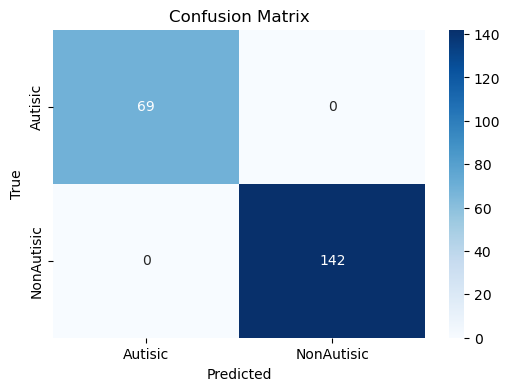

In [42]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn for better visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Autisic', 'NonAutisic'], yticklabels=['Autisic', 'NonAutisic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [54]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

new_input = [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 15, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]  

new_input = np.array(new_input).reshape(1, -1)  

sc = MinMaxScaler()


new_input_scaled = sc.fit_transform(new_input)  

y_pred = LRmodel.predict(new_input_scaled)
print(f"y_pred_non_autistic : {y_pred}")

# y_pred_binary = np.where(y_pred > 0.5, 1, 0) 

if y_pred == 1:
    print("The model predicts the child is likely autistic.")
else:
    print("The model predicts the child is non-autistic.")

y_pred_non_autistic : [0]
The model predicts the child is non-autistic.


In [56]:
# Example input for an autistic child
autistic_input = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 18, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]

# Reshape and scale the input
autistic_input = np.array(autistic_input).reshape(1, -1)
autistic_input_scaled = sc.transform(autistic_input)

# Predict
y_pred_autistic = LRmodel.predict(autistic_input_scaled)
print(f"y_pred_autistic : {y_pred_autistic}")

# y_pred_binary_autistic = np.where(y_pred_autistic > 0.5, 1, 0)

# Output result
if y_pred_autistic == 1:
    print("The model predicts the child is autistic.")
else:
    print("The model predicts the child is non-autistic.")

y_pred_autistic : [1]
The model predicts the child is autistic.


In [57]:
# Example input for a non-autistic child
non_autistic_input = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]

# Reshape and scale the input
non_autistic_input = np.array(non_autistic_input).reshape(1, -1)
non_autistic_input_scaled = sc.transform(non_autistic_input)

# Predict
y_pred_non_autistic = LRmodel.predict(non_autistic_input_scaled)
print(f"y_pred_non_autistic : {y_pred_non_autistic}")

# y_pred_binary_non_autistic = np.where(y_pred_non_autistic > 0.5, 1, 0)

# Output result
if y_pred_non_autistic == 1:
    print("The model predicts the child is autistic.")
else:
    print("The model predicts the child is non-autistic.")

y_pred_non_autistic : [0]
The model predicts the child is non-autistic.


# Save Model 

In [43]:
import pickle

# Assuming 'model' is your trained model
file_path = '/kaggle/working/my_model.pkl'

with open(file_path, 'wb') as f:
    pickle.dump(LRmodel, f)

